In [2]:
import pandas

In [3]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [5]:
import os, geopandas as gpd

countries=gpd.read_file(os.path.join("maps","World_Countries","World_Countries.shp"))

In [6]:
# what is it?
type(countries)

geopandas.geodataframe.GeoDataFrame

In [7]:
# dimensions
countries.shape

(252, 2)

In [8]:
# names
countries.columns

Index(['COUNTRY', 'geometry'], dtype='object')

In [9]:
# some content
countries.head()

,COUNTRY,geometry
0,Aruba (Netherlands),"POLYGON ((-69.88223 12.41111, -69.94695 12.436..."
1,Antigua and Barbuda,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
2,Afghanistan,"POLYGON ((61.27656 35.60725, 61.29638 35.62853..."
3,Algeria,"POLYGON ((-5.15213 30.18047, -5.13917 30.19236..."
4,Azerbaijan,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."


In [10]:
# any missing values?
countries[countries.isna().any(axis=1)]

,COUNTRY,geometry


In [11]:
# types
countries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   COUNTRY   252 non-null    object  
 1   geometry  252 non-null    geometry
dtypes: geometry(1), object(1)
memory usage: 4.1+ KB


<Axes: >

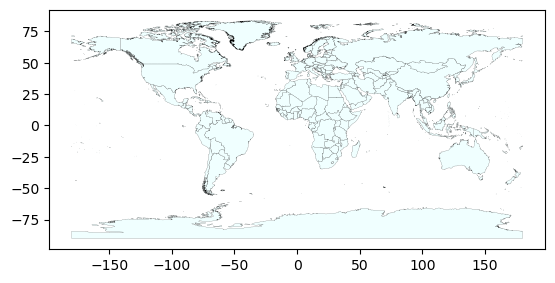

In [12]:
countries.plot(facecolor="azure",#color of polygon fill
               edgecolor='black', #color of lines
               linewidth=0.1) #thickness of lines

In [13]:
rivers=gpd.read_file(os.path.join("maps","World_Hydrography","World_Hydrography.shp"))
cities=gpd.read_file(os.path.join("maps","World_Cities","World_Cities.shp"))

<Axes: >

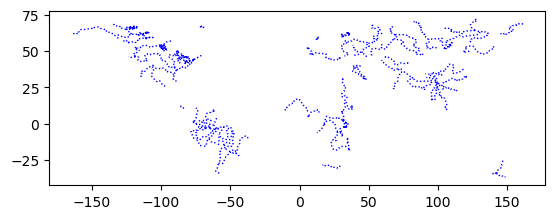

In [14]:
rivers.plot(edgecolor='blue',
            linewidth=1,
            linestyle='dotted')

<Axes: >

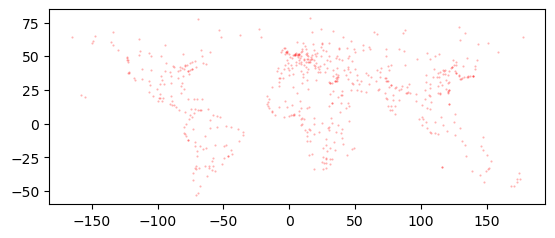

In [15]:
cities.plot(marker='.', # marker type
            color='red',
            markersize=1,
            alpha=0.3) # transparency

In [16]:
countries.crs==cities.crs==cities.crs

True

<Axes: >

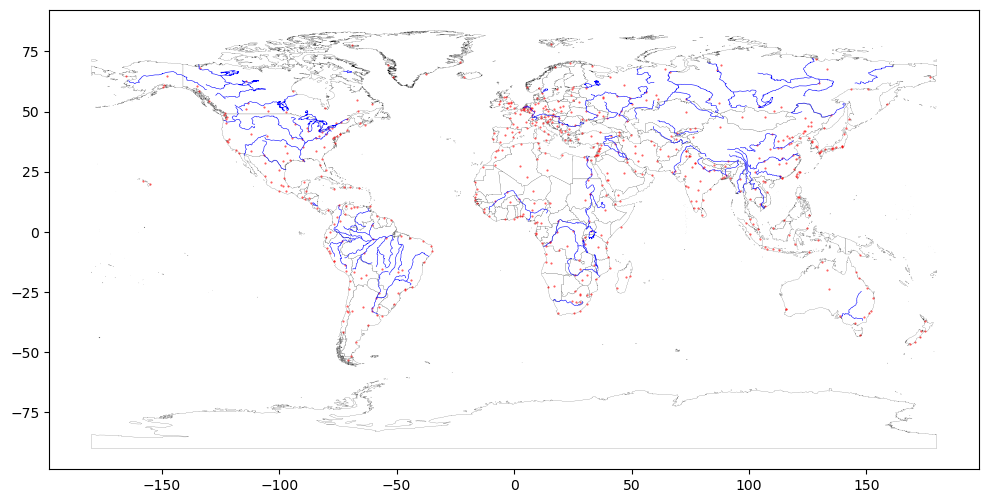

In [17]:
base = countries.plot(facecolor="white",
                      edgecolor='black',
                      linewidth=0.1,
                      figsize=(12,12))

rivers.plot(edgecolor='blue', linewidth=0.4,
            ax=base)# on top of...
cities.plot(marker='.', color='red', markersize=1,alpha=0.7,
            ax=base) # on top of...

In [18]:
countries.to_file(os.path.join("maps","worldMap.gpkg"),layer='countryBorders', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMap.gpkg"),layer='riverLines', driver="GPKG")
cities.to_file(os.path.join("maps","worldMap.gpkg"),layer='cityPoints', driver="GPKG")

In [19]:
brazil=countries[countries.COUNTRY=='Brazil']

In [20]:
citiesBrazil_clipped = gpd.clip(gdf=cities,
                          mask=brazil)
riversBrazil_clipped = gpd.clip(gdf=rivers,
                               mask=brazil)

<Axes: >

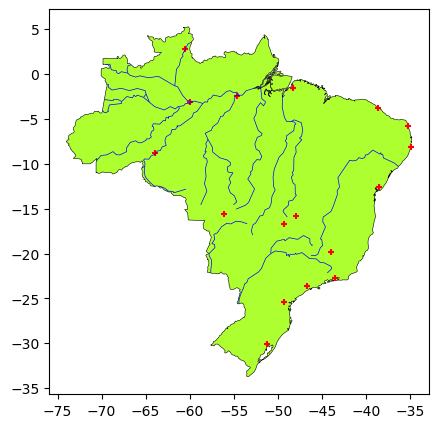

In [21]:
base = brazil.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesBrazil_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)
riversBrazil_clipped.plot(edgecolor='blue', linewidth=0.5,
                    ax=base)

In [22]:
brazil.geom_type

29    MultiPolygon
dtype: object

In [23]:
citiesBrazil_clipped.geom_type

285    Point
279    Point
276    Point
271    Point
268    Point
340    Point
275    Point
274    Point
568    Point
266    Point
447    Point
261    Point
338    Point
380    Point
381    Point
318    Point
421    Point
dtype: object

In [24]:
riversBrazil_clipped.geom_type

56         LineString
55         LineString
97         LineString
67         LineString
70         LineString
38         LineString
24    MultiLineString
5          LineString
64         LineString
68         LineString
83    MultiLineString
92    MultiLineString
59         LineString
37         LineString
80         LineString
1     MultiLineString
60         LineString
29    MultiLineString
66    MultiLineString
62         LineString
54         LineString
dtype: object

In [25]:
peru=countries[countries.COUNTRY=='Peru']

In [26]:
citiesPeru_clipped = gpd.clip(gdf=cities,
                          mask=peru)
riversPeru_clipped = gpd.clip(gdf=rivers,
                               mask=peru)

<Axes: >

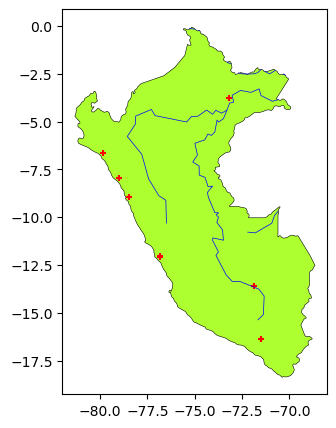

In [27]:
base = peru.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
citiesPeru_clipped.plot(marker='+', color='red', markersize=15,
                    ax=base)
riversPeru_clipped.plot(edgecolor='blue', linewidth=0.5,
                    ax=base)

In [28]:
peru.geom_type

172    Polygon
dtype: object

In [29]:
citiesPeru_clipped.geom_type

269    Point
339    Point
529    Point
317    Point
423    Point
260    Point
476    Point
422    Point
dtype: object

In [30]:
riversPeru_clipped.geom_type

59         LineString
1     MultiLineString
60    MultiLineString
85         LineString
65         LineString
dtype: object

In [ ]:
countries.to_file(os.path.join("maps","worldMap.gpkg"),layer='countryBorders', driver="GPKG")
rivers.to_file(os.path.join("maps","worldMap.gpkg"),layer='riverLines', driver="GPKG")
cities.to_file(os.path.join("maps","worldMap.gpkg"),layer='cityPoints', driver="GPKG")